<img src="images/Strawberry_Creek.png" style="width: 400px;"/>

Welcome! Throughout this lab you will use R to analyze the data collected from the North and South Forks of Strawberry Creek. R is a general-purpose programming language that allows one to use data analysis methods to answer questions about data. In this part of the lab we will apply statistical methods to the biological metrics data to determine whether or not the water quality (or ecological health) of the two forks of Strawberry Creek is significantly different.

# 1. Jupyter Notebooks <a id="1"></a>

---


This portion of the lab is set up in a Jupyter Notebook. A Jupyter Notebook is an online, interactive computing environment, composed of different types of cells. Cells are chunks of code or text that are used to break up a larger notebook into smaller, more manageable parts and to let the viewer modify and interact with the elements of the notebook.

### Types of cells <a id= '1.1'> </a>
    
There are two types of cells in Jupyter, code cells and markdown cells. Code cells are cells indicated with “In [ ]:” to the left of the cell. In these cells you can write you own code and run the code in the individual cell. Markdown cells hold text a majority of the time and do not have the “In [ ]” to the left of the cell.


### Running cells <a id= '1.2'> </a>

'Running' a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a code cell, you can do one of the following:

press Shift + Enter
click Cell -> Run Cells in the toolbar at the top of the screen.
You can navigate the cells by either clicking on them or by using your up and down arrow keys. Try running the cell below to see what happens.

In [75]:
print("Hello, World")

[1] "Hello, World"


The input of the cell consists of the text/code that is contained within the cell's enclosing box. Here, the input is an expression in R that "prints" or repeats whatever text or number is passed in. 

The output of running a cell is shown in the line immediately after it. Notice that markdown cells have no output. 

### Editing, Saving and Submitting <a id='1.3'> </a>

- To __edit__ a cell simply click on the desired cell and begin typing 
- To __save__ your notebook press _command + s_ on the keyboard 
- We will go into the specifics of how to __submit__ your work at the end of the lab, but you will essentially be converting your work into a PDF file and then including it in your Lab Report

Learning Outcomes

By the end of this notebook and accompanying lab, students should be able to:

Understand how to construct a Null and Alternative Hypothesis.
Use randomization to determine if two distributions are different.
Interpret a p-value to describe statistical significance.

Run this cell before proceeding with the rest of the lab!

In [76]:
install.packages(c("dplyr", "tidyr", "googlesheets4", "ggplot2", "reshape2"))

Installing packages into ‘/srv/r’
(as ‘lib’ is unspecified)



In [77]:
# Load necessary packages!
library(dplyr)
library(tidyr)
library(googlesheets4)
library(ggplot2)
library(reshape2)

<br><br><br><br>

# 2. Importing the Data <a id='2'> </a>
---

Today, we'll be using a set of data that were previously collected from Strawberry Creek and entered into a spreadsheet saved in the csv format. To import the data set just run the following cell! If all goes smoothly, you will see the first few rows of your data file.

In [78]:
# Run this cell to load the data. You will see the first 6 rows of the dataset below the cell

gs4_deauth() # This will work for a google sheets where anyone with a link can view. 

sheet_url = "https://docs.google.com/spreadsheets/d/11P9IKEIBGcPffTsTrGuINXSwM8NTaGaFZHmzpUJgZxQ/edit?usp=sharing"

# Read the worksheet
straw_creek_data = read_sheet(sheet_url, sheet = "Sheet1") #Can change the specific sheet to whatever

head(straw_creek_data)

✔ Reading from bio test.

✔ Range ''Sheet1''.

New names:
• `` -> `...1`
• `` -> `...14`


...1,Site,Section,Fork,Restoration,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,...14
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Natalie, Audrey, Kate",E,311,South,Y,50,0,25,50.0,37.5,0,100,50.0,39.0625
"Zach, Ryan, Ethan",F,311,South,Y,75,100,75,87.5,62.5,0,50,62.5,64.0625
"Giorgio, Caitlyn, John, Keira",G,311,South,N,100,25,75,62.5,62.5,0,50,75.0,56.2500
"Caleb, Max, Edward",H,311,South,N,100,100,50,75.0,62.5,0,100,100.0,73.4375
"Manasi, Amirah, Selah, Noor, Juan",I,311,South,N,100,100,25,62.5,62.5,0,100,50.0,62.5000
"Jettiene, Hayaan, Angie",K,311,South,N,25,100,50,75.0,75.0,0,75,100.0,62.5000


<br>

# 3. Introduction to Data Analytics <a id= '3'> </a>
---

## Null Hypothesis vs. Alternative Hypothesis <a id='3.1'> </a>

One of the first problems to work through when looking at a data set is to determine if the RipRAM Index score and/or other metrics are different for different sites on Strawberry Creek. You will be able to make two types of comparisons: (1) compare the North fork to the South fork (2) compare sites that have been restored since 2000 to sites that have not be restored If we determine that our samples are more different than is expected by chance, then we can say that the difference is significant and conclude that our samples represent real differences. 

To do this we begin by forming a null hypothesis and an alternative hypothesis to test. 

>__Null Hypothesis__: A null hypothesis claims that there is no statistical difference between two samples and that any difference is due to experimental error, measurement error, or chance.

>__Alternative Hypothesis__: An alternative hypothesis states that the difference in samples is meaningful, or significant.

**Example Null and Alternative Hypothesis**


Say we have a data set with samples of the number of boba shops on Southside and Northside. The data set shows that Southside has a higher average of boba shops than Northside, but it is unclear whether the difference in the average is due to chance or some other unknown reason. For this data set, potential hypotheses would be:

>__Example Null Hypothesis__
- The distribution of the average number of boba shops is the same for the samples taken from Southside as the samples taken from Northside. The difference in sample distribution is due to chance. 

>__Example Alternative Hypothesis__  
- The average number of boba shops in samples from Southside is lower than the average number of boba shops in samples from Northside.

<!-- END QUESTION --> 
After you have your null and alternative hypothesis, the next step is to simulate the distribution under the null hypothesis! Theoretically, if the differences in distributions were solely due to random chance, then the data that the distribution originally comes from would be the same. This is where randomization tests come into play.


## Total RipRam Index Score Analysis 

The Riparian Rapid Assessment Method (RipRAM) Index Score is a metric used to evaluate the overall health of a riparian area along a stream or river. It is an average of the 8X metrics you collected during lab. We’ve pooled the data from multiple sections together so that you can work with the data from all the sites on campus. With so many people working together, you have access to data from 21 sites!

Let's start with using every metric to test the total health of Strawberry Creek! The first couple of columns for the class data are site information. The remaining columns are the numeric values you collected in the field. We are going to average those values to get a total Index Score (the total health of the stream) based on all of the values. 

In [79]:
# Find the columns that have the word "Metric" in the header
metric_cols = grep("Metric", names(straw_creek_data), value = TRUE) 

# Calculate Index Score as the average across metrics
straw_creek_data$"Index Score" = rowMeans(straw_creek_data[, metric_cols]) 

head(straw_creek_data)

...1,Site,Section,Fork,Restoration,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,...14,Index Score
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Natalie, Audrey, Kate",E,311,South,Y,50,0,25,50.0,37.5,0,100,50.0,39.0625,39.0625
"Zach, Ryan, Ethan",F,311,South,Y,75,100,75,87.5,62.5,0,50,62.5,64.0625,64.0625
"Giorgio, Caitlyn, John, Keira",G,311,South,N,100,25,75,62.5,62.5,0,50,75.0,56.2500,56.2500
"Caleb, Max, Edward",H,311,South,N,100,100,50,75.0,62.5,0,100,100.0,73.4375,73.4375
"Manasi, Amirah, Selah, Noor, Juan",I,311,South,N,100,100,25,62.5,62.5,0,100,50.0,62.5000,62.5000
"Jettiene, Hayaan, Angie",K,311,South,N,25,100,50,75.0,75.0,0,75,100.0,62.5000,62.5000


## North and South Forks of Strawberry Creek

The Strawberry Creek watershed is an urban watershed comprised of two creeks which start in the Berkeley Hills, join on the UC Berkeley campus, then flow as a single creek to the San Francisco Bay. The North Fork of Strawberry Creek starts from a spring under a residential area in the Berkeley Hills above campus. The South Fork of Strawberry Creek originates in Strawberry Canyon (also in the Berkeley Hills, but further south), above Memorial Stadium, . There are different types of land use in the watersheds and riparian areas of  the two forks. The North Fork has a watershed containing some residential areas and flows through the Lawrence Berkeley National Laboratory campus, mostly as an underground culvert, before it emerges above ground on the northern edge of campus. The South Fork mostly flows above ground through Strawberry Canyon, which has steep slows that are mostly forested but also contains the UC Botanical Gardens. Both forks eventually flow through the UC Berkeley campus, then converge on the west side of the Valley Life Science Building. 

One of the important questions regarding this creek is how healthy the North fork is compared to the South fork. You can use the RipRAM Index score to look at the overall health of the sites. 


Remember, the methods are as follows: 

__Metric 1__: Total Vegetation Cover	

__Metric 2__: Vegetation Structure	

__Metric 3__: Vegetation Quality	

__Metric 4__: Age Diversity	

__etric 5__: Riparian Vegetation Width	

__Metric 6__: Riparian Soil Condition	

__Metric 7__: Macroinvertebrate Habitat Patch Richness	

__Metric 8__: Anthropogenic Altertations 



In the following cell, run the code to seperate out metrics for each fork of Strawberry Creek. 

In [80]:
# Look at all metrics and subdivide by N and S forks
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols = names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]


# Subset for N and S forks
N_data = straw_creek_data[straw_creek_data$Fork == "North", c("Site", metric_cols)]
N_data$Fork_Label = "North"

S_data = straw_creek_data[straw_creek_data$Fork == "South", c("Site", metric_cols)]
S_data$Fork_Label = "South"


# View results for North and South Fork seperatley
N_data
S_data

Site,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,Fork_Label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alpha,75,25,0,87.5,100.0,0,75,100.0,North
D,25,100,25,50.0,37.5,0,75,100.0,North
B,75,75,75,25.0,50.0,0,100,62.5,North
A,25,25,0,12.5,37.5,0,100,37.5,North
C,25,50,50,12.5,100.0,0,25,75.0,North


Site,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,Fork_Label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E,50,0.0,25.0,50.0,37.5,0,100,50.0,South
F,75,100.0,75.0,87.5,62.5,0,50,62.5,South
G,100,25.0,75.0,62.5,62.5,0,50,75.0,South
H,100,100.0,50.0,75.0,62.5,0,100,100.0,South
I,100,100.0,25.0,62.5,62.5,0,100,50.0,South
K,25,100.0,50.0,75.0,75.0,0,75,100.0,South
L,75,25.0,25.0,37.5,12.5,0,75,37.5,South
E,0,25.0,75.0,87.5,62.5,0,75,37.5,South
F,100,75.0,50.0,63.0,63.0,0,75,63.0,South


In [81]:
## Now lets average the Index Score for each fork. 

# Create Index Score for North
N_data$`Index Score` = rowMeans(N_data[, metric_cols])

# Create Index Score for South
S_data$`Index Score` = rowMeans(S_data[, metric_cols])

# Compute average Index Score per fork
N_mean_index = mean(N_data$`Index Score`)
S_mean_index = mean(S_data$`Index Score`)

# View results
cat("North Mean Index Score:", N_mean_index, "\n")
cat("South Mean Index Score:", S_mean_index, "\n")

North Mean Index Score: 47.8125 
South Mean Index Score: 51.99698 


## Individual Metric analysis

Now, it's up to you. Choose what metrics you would like! In the next cell, type in which metrics you would like to compare between the North and South forks. To do this, delete (or add after deleting) strings (the words found within " "). The phrasing must be exact: "Metric #"

In [82]:
## Write whih metrics you would like to look at here: 
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols = names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]

straw_creek_data_long = melt(
  straw_creek_data,
  id.vars = c("Site", "Fork"),
  measure.vars = metric_cols,
  variable.name = "Metric",
  value.name = "Score"
)


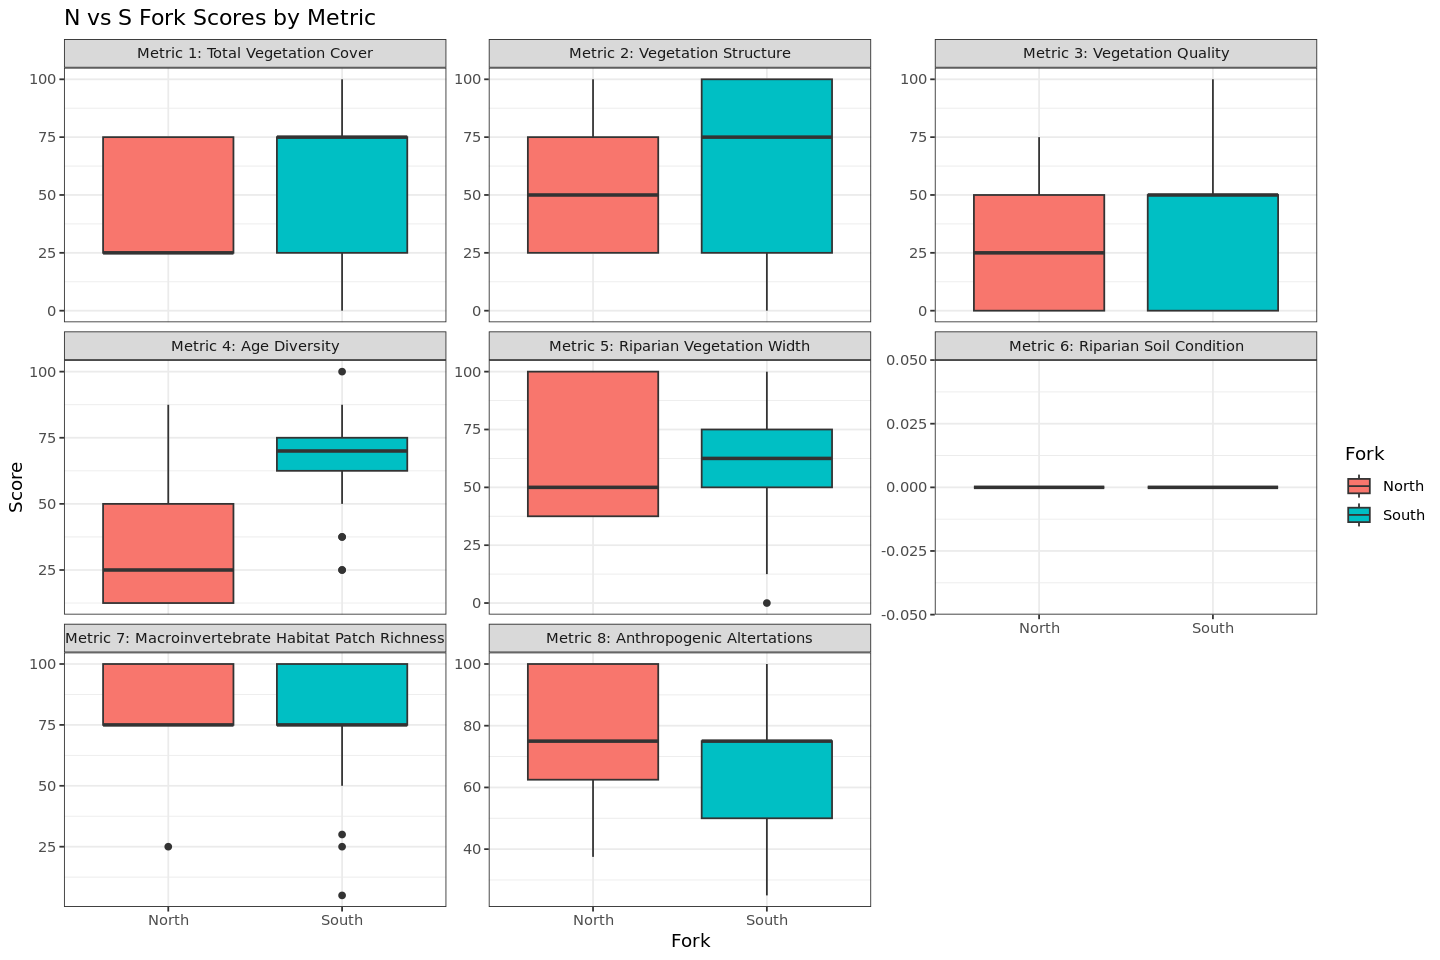

In [83]:
options(repr.plot.width = 12, repr.plot.height = 8) #Change the plot size

ggplot(straw_creek_data_long, aes(x = Fork, y = Score, fill = Fork)) +
  geom_boxplot() +
  facet_wrap(~ Metric, scales = "free_y") +
  labs(
    title = "N vs S Fork Scores by Metric",
    x = "Fork",
    y = "Score"
  ) +
  theme_bw()

##  Restoration of Strawberry Creek  

The Strawberry Creek Restoration Program began in 1987 with the adoption of the Strawberry Creek Management Plan. The program’s early goals were to:
identify harmful releases from the Campus
eliminate these harmful releases
re-introduce native fish species to the creek


After extensive work repairing sanitary sewer and storm lines to prevent contamination, the Office of Environment, Health, and Safety successfully re-introduced three native fish species to the creek in 1988. The offspring of these initial populations still live in Strawberry Creek today. 
Since then, restoration efforts have expanded to include stabilizing creek banks, planting native vegetation in the channel zone and riparian zone, and removing invasive species. During the 20th Century, ivy and other non-native plants overran the area, suppressing the native biodiversity that once thrived along the Strawberry Creek. Thanks to many student and community volunteers in the past 20 years, many sections of the creek are now relatively weed-free and can support native vegetation. This work is ongoing - join Strawberry Creek Restoration Group for an event  and help continue the recover of the vital campus ecosystem!
One of the important questions regarding this creek is how healthy the restored sites are is compared to the sites that haven’t has active restoration. You can compare the RipRAM Index score different sites to get an understanding of the overall health. 


The following code is almost identical to the code above comparing the North and South Forks. However, here we are interested in the Index Score comparisons between sites that have had active restoration and those that have not had any restoration. 

In [84]:
# Look at all metrics and subdivide by restored and not restored sites
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols = names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]


# Subset for restored and not restored sites 
restored = straw_creek_data[straw_creek_data$Restoration == "Y", c("Site", metric_cols)]
restored$Restoration_Label = "Yes"

not_restored = straw_creek_data[straw_creek_data$Restoration == "N", c("Site", metric_cols)]
not_restored$Restoration_Label = "No"


# View results for  restored and not restored sites seperatley
restored
not_restored

Site,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,Restoration_Label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E,50,0,25,50.0,37.5,0,100,50.0,Yes
F,75,100,75,87.5,62.5,0,50,62.5,Yes
E,0,25,75,87.5,62.5,0,75,37.5,Yes
F,100,75,50,63.0,63.0,0,75,63.0,Yes
R,25,50,25,75.0,62.5,0,100,75.0,Yes
E,25,25,25,75.0,25.0,0,100,25.0,Yes
F,75,100,50,87.5,75.0,0,75,75.0,Yes


Site,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,Restoration_Label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
G,100,25.0,75.0,62.5,62.5,0,50,75.0,No
H,100,100.0,50.0,75.0,62.5,0,100,100.0,No
I,100,100.0,25.0,62.5,62.5,0,100,50.0,No
K,25,100.0,50.0,75.0,75.0,0,75,100.0,No
L,75,25.0,25.0,37.5,12.5,0,75,37.5,No
G,75,0.0,0.0,70.0,50.0,0,30,35.0,No
H,0,100.0,50.0,87.5,52.5,0,25,50.0,No
I,0,50.0,0.0,25.0,37.5,0,75,37.5,No
K,35,33.3,12.5,62.5,62.5,0,75,75.0,No


In [85]:
## Now lets average the Index Score for both restored and not restored sites.  

# Create Index Score for restored
restored$`Index Score` = rowMeans(restored[, metric_cols])

# Create Index Score for not restored
not_restored$`Index Score` = rowMeans(not_restored[, metric_cols])

# Compute average Index Score per fork
restored_mean_index = mean(restored$`Index Score`)
not_restored_mean_index = mean(not_restored$`Index Score`)

# View results
cat("Restored Mean Index Score:", restored_mean_index, "\n")
cat("Not Restored Mean Index Score:", not_restored_mean_index, "\n")

Restored Mean Index Score: 52.25893 
Not Restored Mean Index Score: 51.15417 


## Individual Metric analysis

Now, it's up to you. Choose what metrics you would like! In the next cell, type in which metrics you would like to compare between the restored and not restored sites. To do this, delete (or add after deleting) strings (the words found within " "). The phrasing must be exact: "Metric #"

In [86]:
## Write whih metrics you would like to look at here: 
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols = names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]

straw_creek_data_long = melt(
  straw_creek_data,
  id.vars = c("Site", "Restoration"),
  measure.vars = metric_cols,
  variable.name = "Metric",
  value.name = "Score"
)


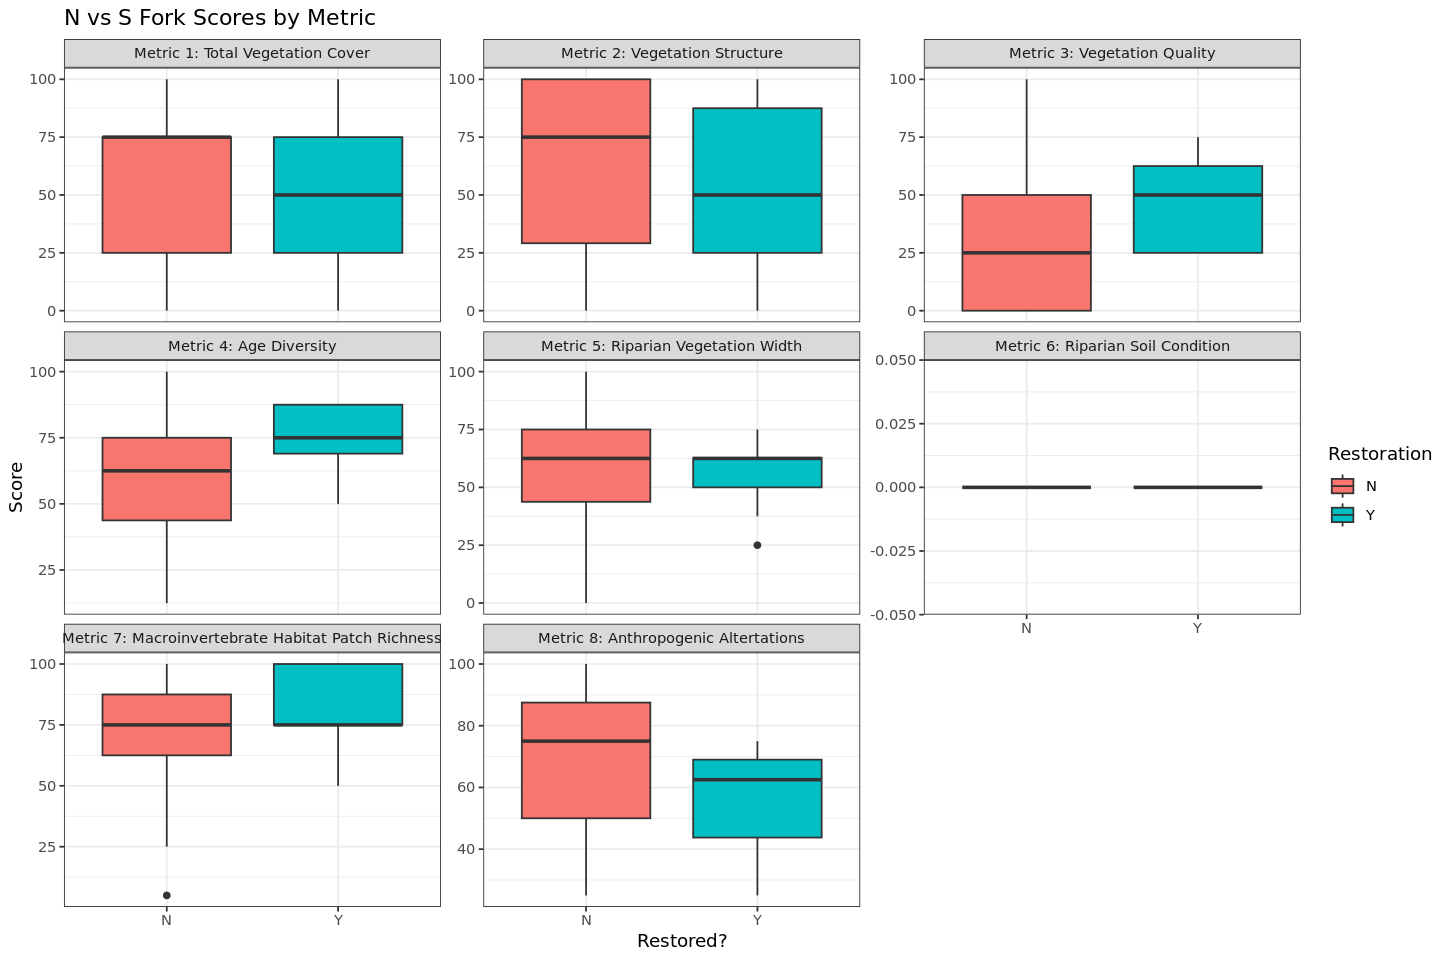

In [87]:
options(repr.plot.width = 12, repr.plot.height = 8) #Change the plot size

ggplot(straw_creek_data_long, aes(x = Restoration, y = Score, fill = Restoration)) +
  geom_boxplot() +
  facet_wrap(~ Metric, scales = "free_y") +
  labs(
    title = "N vs S Fork Scores by Metric",
    x = "Restored?",
    y = "Score"
  ) +
  theme_bw()

## Individual Metric analysis

## RANDOMIZATION TEST 

A randomization test __shuffles a data set among categories and creates new distributions__.  In this case, we are using a randomization test to shuffle the difference in ecological health of the two groups you are comparing. That could be the two forks of Strawberry Creek or the restored vs. unrestored sites on the creek. As was previously mentioned, a randomization test simulates the null hypothesis because it assumes that there is no significant difference between the distributions.

To demonstrate, we will run randomization testing on example data of a biotic index (FBI scores) collected from the North and South Fork in order to understand the process. This is a new metric that you did not collect, but the principle is the same. After working through the example, yYou will analyze your own data. 


Run the following code below to enter the example data and see it displayed in a data frame.

In [88]:
example = data.frame(
  `FBI_Score` = c(3.5, 4.0, 3.0, 3.5, 4.2, 4.5, 5.0, 3.6, 4.9, 5.1, 3.4, 2.9),
  'Fork' = c(rep("North", 5), rep("South", 7))
)
#example$FBI_Score = as.numeric(example$FBI_Score)

example

FBI_Score,Fork
<dbl>,<chr>
3.5,North
4.0,North
3.0,North
3.5,North
4.2,North
4.5,South
5.0,South
3.6,South
4.9,South


Here, we see each row of the dataset represents an FBI Score for a specific Fork, either North or South.

With the data, we can compare the North and South Fork by calculating the difference between the means of each Fork. Run the cell below to see the observed difference in FBI means between the two samples.

In [89]:
# Calculate observed difference between means between forks
observed_difference = abs(
  mean(example$FBI_Score[example$Fork == "North"]) -  mean(example$FBI_Score[example$Fork == "South"])
)

observed_difference

[1] 0.56

We call this our observed difference because this statistic is observed from data that was actually collected.

To illustrate how we find the observed difference, we plot the distribution of FBI scores for each Fork. For each distribution, we plot its mean. Notice that subtracting the two means results in our observed difference from above.

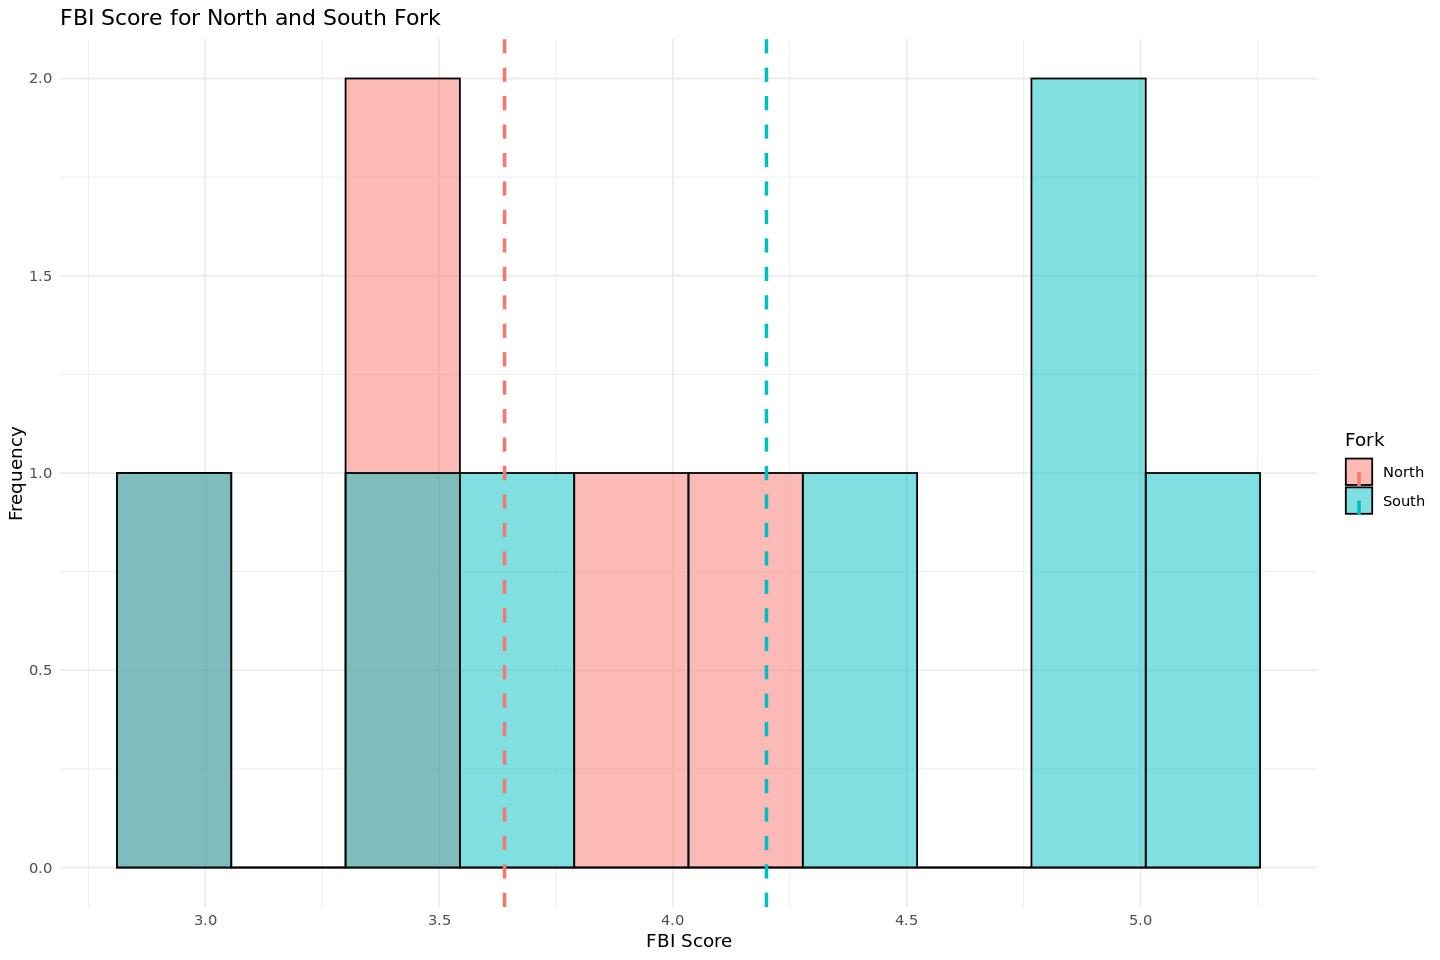

In [90]:

ggplot(example, aes(x = `FBI_Score`, fill = Fork)) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 10, color = "black") +
  
  # Add vertical lines for group means
  geom_vline(
    data = aggregate(`FBI_Score` ~ Fork, data = example, mean),
    aes(xintercept = `FBI_Score`, color = Fork),
    linetype = "dashed",
    linewidth = 1
  ) +
  
  labs(
    x = "FBI Score",
    y = "Frequency",
    title = "FBI Score for North and South Fork",
    fill = "Fork",
    color = "Fork"
  ) +
  theme_minimal()

In randomization testing, the data points are 'shuffled' between the two forks. That is, the analysis takes data from the North Fork and the South Fork and creates a new data set by placing the data into new North and South Fork data sets randomly. In this way we can test how likely it is to obtain the observed differences between the North and South fork by chance alone.

For one randomization, we will calculate the FBI Score means for each fork. In this case, the mean difference is no longer an observed difference but a simulated difference. Run the cells below to generate a randomization of the data and to calculate the new difference.

In [91]:
perm_example = data.frame(
  `FBI_Score` = sample(example$`FBI_Score`, size = nrow(example)),  # random shuffling
  Fork = c(rep("North", 5), rep("South", 7))
)

perm_example

FBI_Score,Fork
<dbl>,<chr>
3.6,North
3.0,North
4.2,North
4.5,North
4.0,North
2.9,South
3.4,South
3.5,South
4.9,South


In [92]:
perm_difference = abs(
  mean(perm_example$`FBI_Score`[perm_example$Fork == "North"]) - mean(perm_example$`FBI_Score`[perm_example$Fork == "South"])
)

perm_difference

[1] 0.1828571

This is just for one randomization of the data. We perform many randomization tests (about 1000 of them) and with these values we can plot the distribution of differences of means. Using this distribution of simulated differences, we can compare it with our actual observed difference to see how likely it is to observe this difference and if our null hypothesis is true.

In [93]:
# Function to compute absolute difference in means
difference_in_means = function(df) {
  abs(mean(df$`FBI_Score`[df$Fork == "North"]) - mean(df$`FBI_Score`[df$Fork == "South"]))
}

# Number of permutations
n_repeats = 1000
permutation_differences = numeric(n_repeats)

# Run permutation test

for (i in 1:n_repeats) {
  # Shuffle FBI Scores
  shuffled_scores = sample(example$`FBI_Score`)
  
  perm_df = data.frame(
    `FBI_Score` = shuffled_scores,
    Fork = example$Fork
  )
  
  # Compute difference in means
  permutation_differences[i] = difference_in_means(perm_df)
}

# Inspect results
head(permutation_differences)

[1] 0.22857143 0.01142857 0.74285714 0.28571429 0.19428571 0.42285714

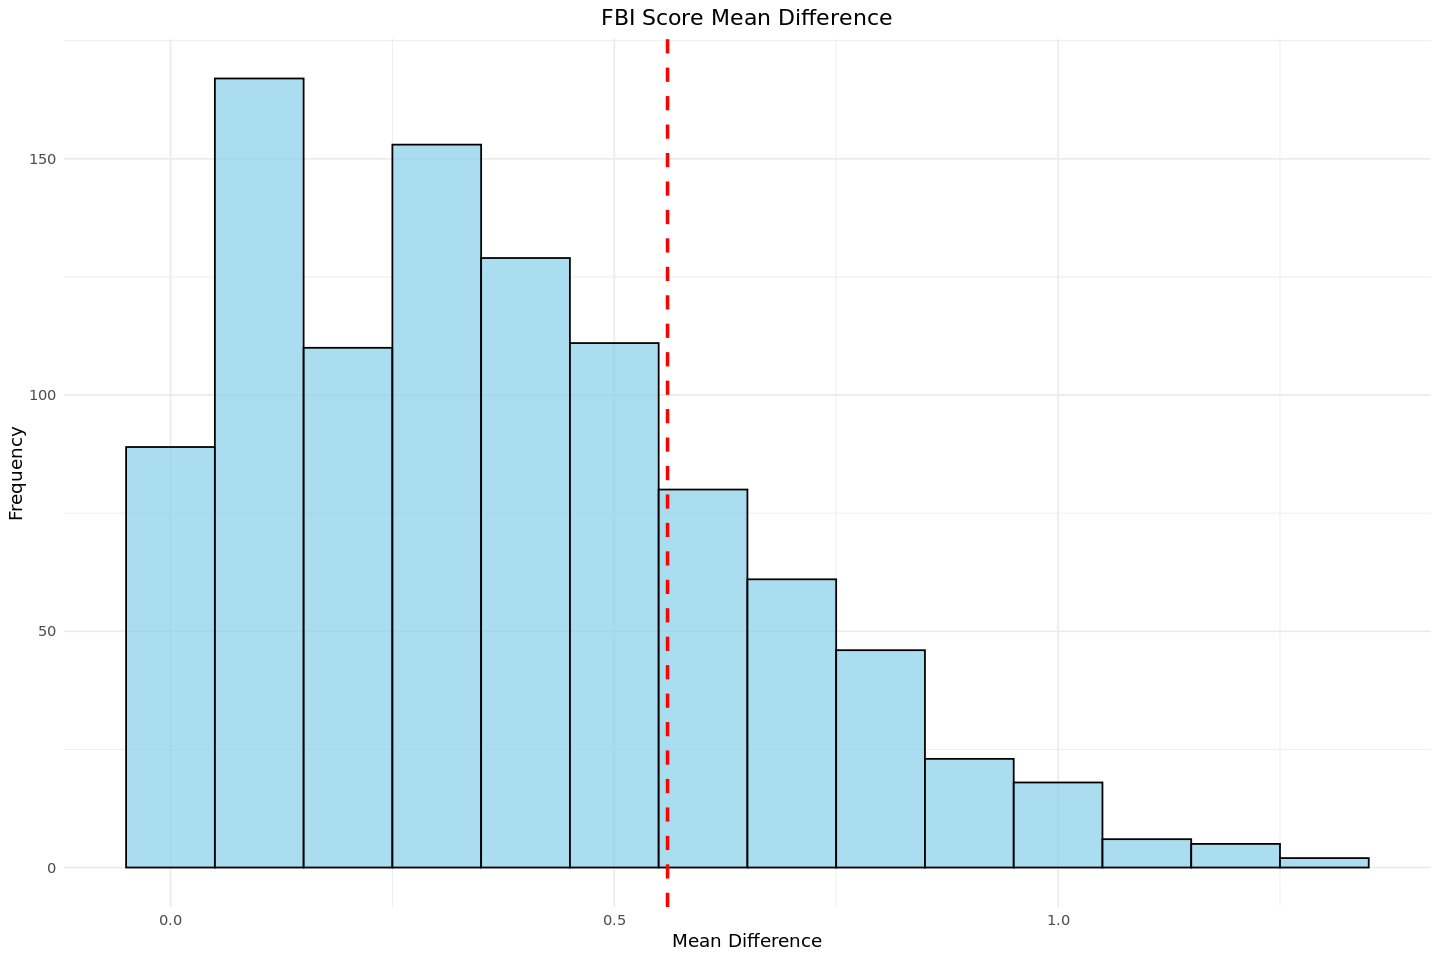

In [94]:
# Create a data frame for plotting
perm_df = data.frame(Difference = permutation_differences)

# Plot histogram with observed difference line
ggplot(perm_df, aes(x = Difference)) +
  geom_histogram(binwidth = 0.1, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = observed_difference), 
             color = "red", linetype = "dashed", size = 1) +
  labs(
    x = "Mean Difference",
    y = "Frequency",
    title = "FBI Score Mean Difference"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  # center the title

## P-Values & Statistical Significance <a id='3.3'> </a>

Now that we have a distribution of what the differences in FBI Scores generally look like, we can calculate the p-value to determine how probable it is for the observed_difference to occur. To calculate the p-value we count the number of times the difference is more extreme than the observed difference in the distribution and divide it by the total number of randomizations.

In [95]:
p_val_count = sum(permutation_differences > observed_difference) / length(permutation_differences)

p_val_count

[1] 0.225


If the p-value is small, it indicates that it is very unlikely for this result to occur and we say we “reject the null hypothesis”, meaning that the observed data likely represent an actual difference between the North and South Fork samples. Otherwise, if the p-value is large, it implies that the observed test statistic has a high likelihood of occurring and we say we “fail to reject the null hypothesis”.

A conventional cut-off for p-values is 0.05 or 5%. If the p-value is less than or equal to 5%, then the p-value is deemed “statistically significant”. Here, the p-value is larger than that. We will discuss p-values more in lab.

The last chart you made shows a distribution of differences (e.g. mean of north fork samples - mean of south fork samples) for 1000 randomized simulations. We can see that most often the difference between the means are below 0.6. The mean from the observed data is indicated by the dashed red line.


Using this plot, we can guess if the null hypothesis is true (the observed difference between the two forks is due to random chance) or if the alternative hypothesis is true (that it is not due to chance alone).

__Go to your student worksheet and answer the Questions for Activity 2, then come back here after Activity 3 to analyse your own data for your graphical abstract__.



# 4. Your Data<a id='4'> </a>


Now, instead of using example data, you will use the data you imported and calculate the mean differences for each of the metrics you measured. Run the next cell for the observed differences between forks for each of the biological measures and the Index Scores. . Once you have run the code, look for the histogram plot that matches your hypothesis. There is also a table at the end with the p-values. Include the p-value and the figures you want to use on the Graphical Abstract. 

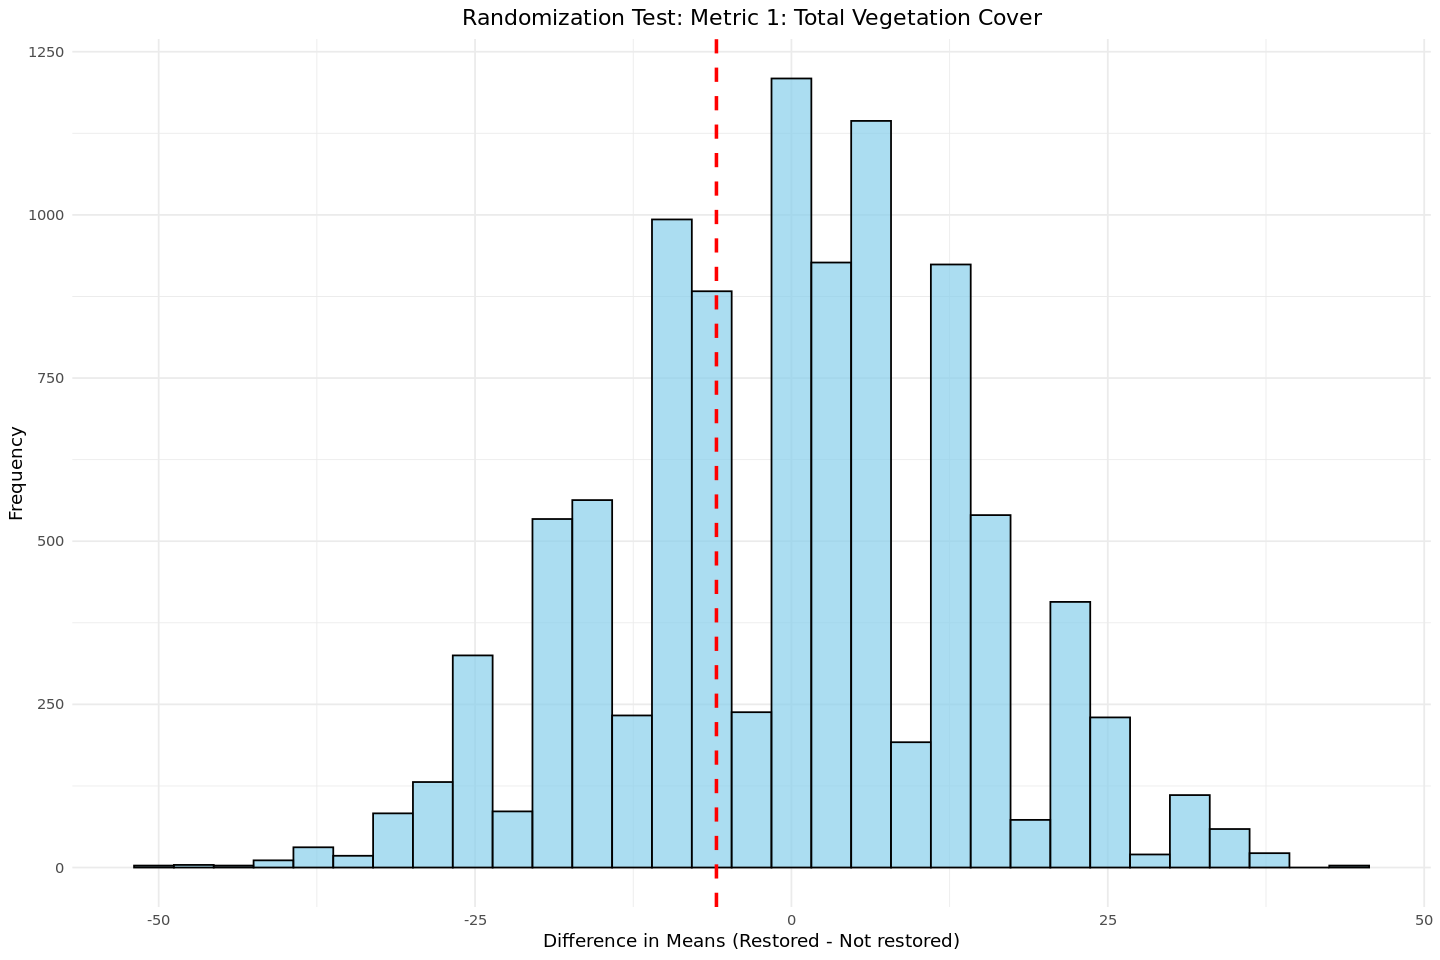

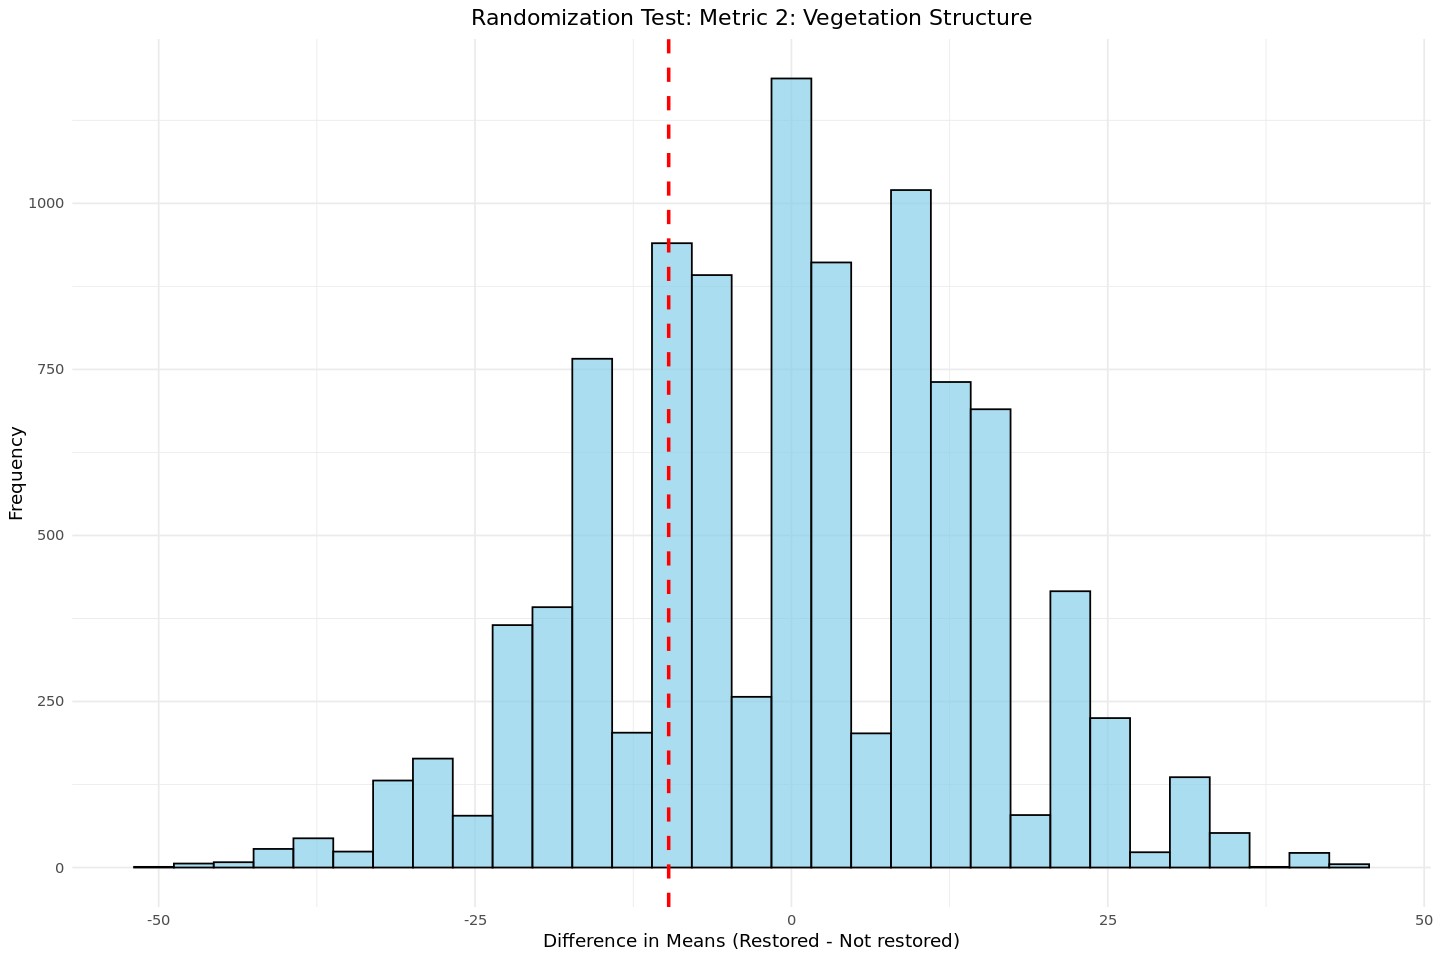

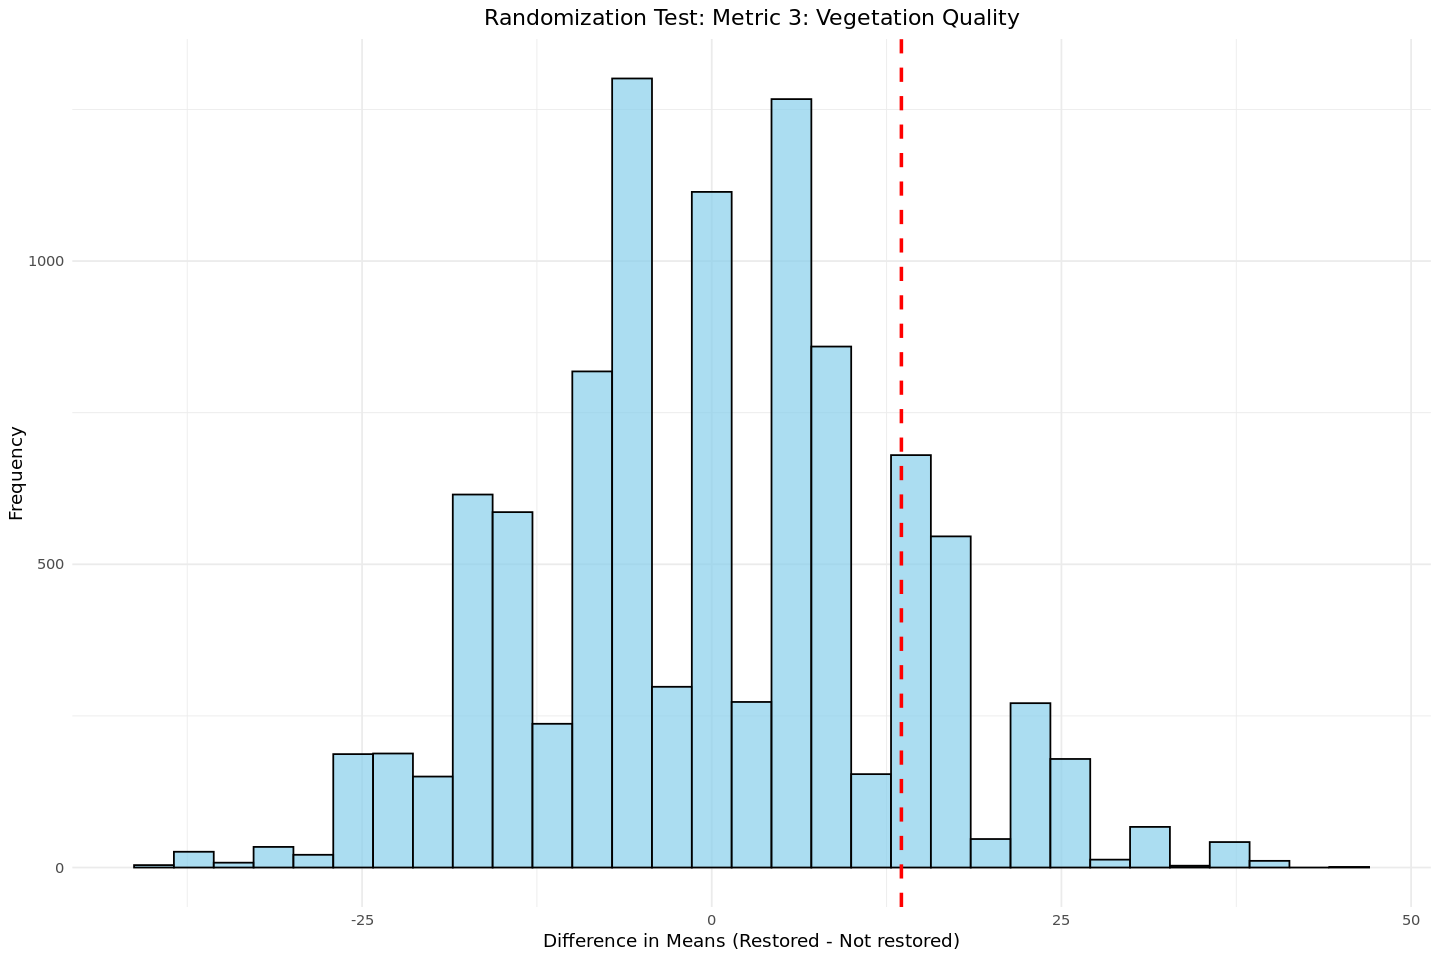

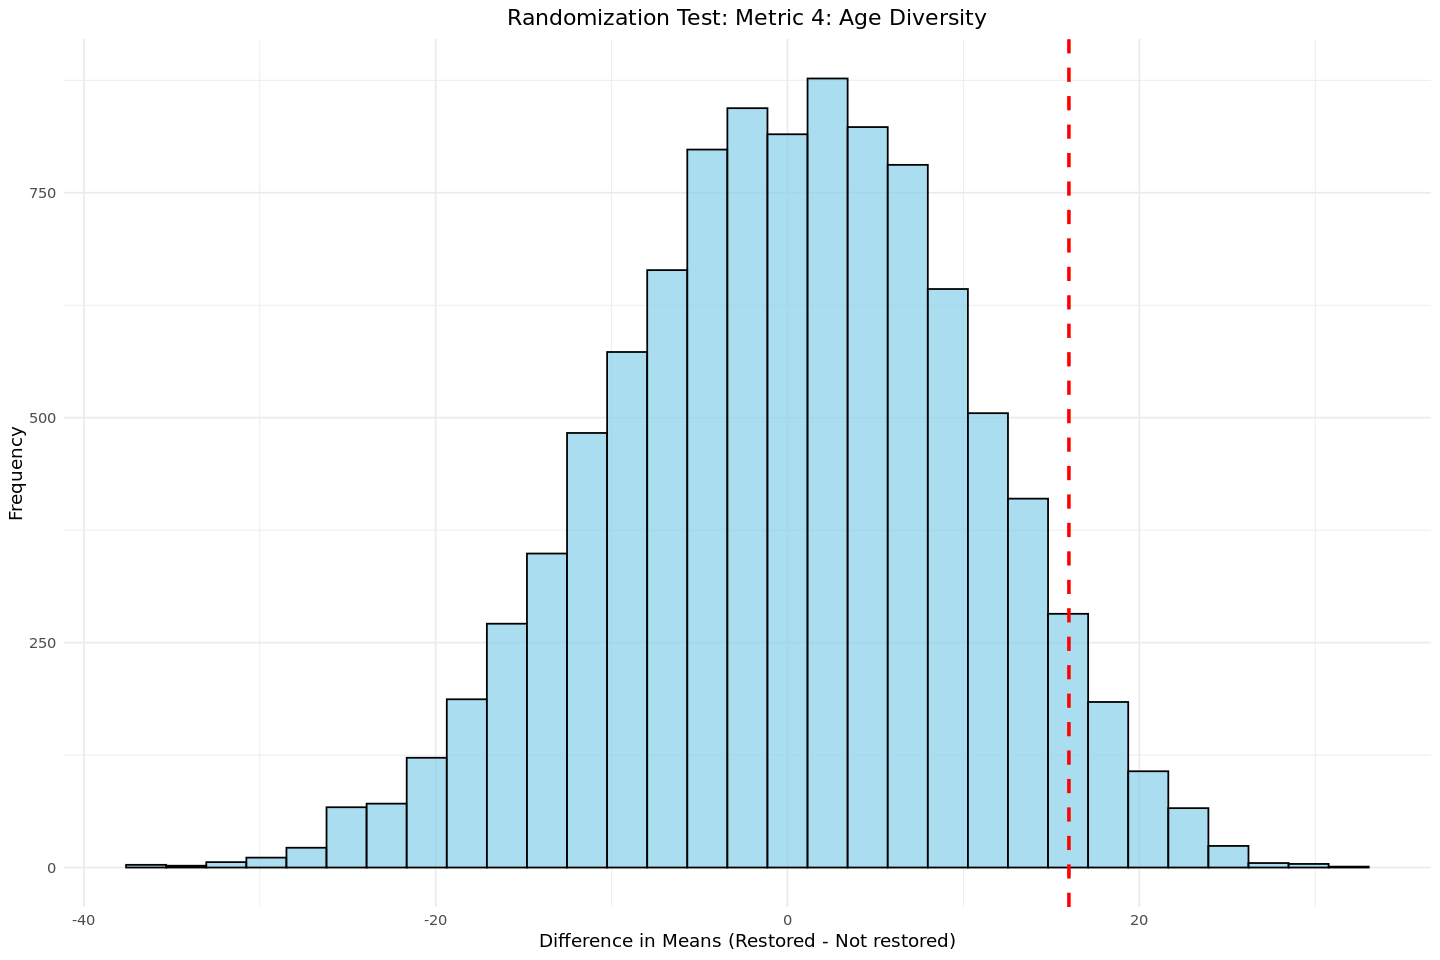

Warning message:
“Computation failed in `stat_bin()`.
Caused by error in `seq.default()`:
! 'from' must be a finite number”


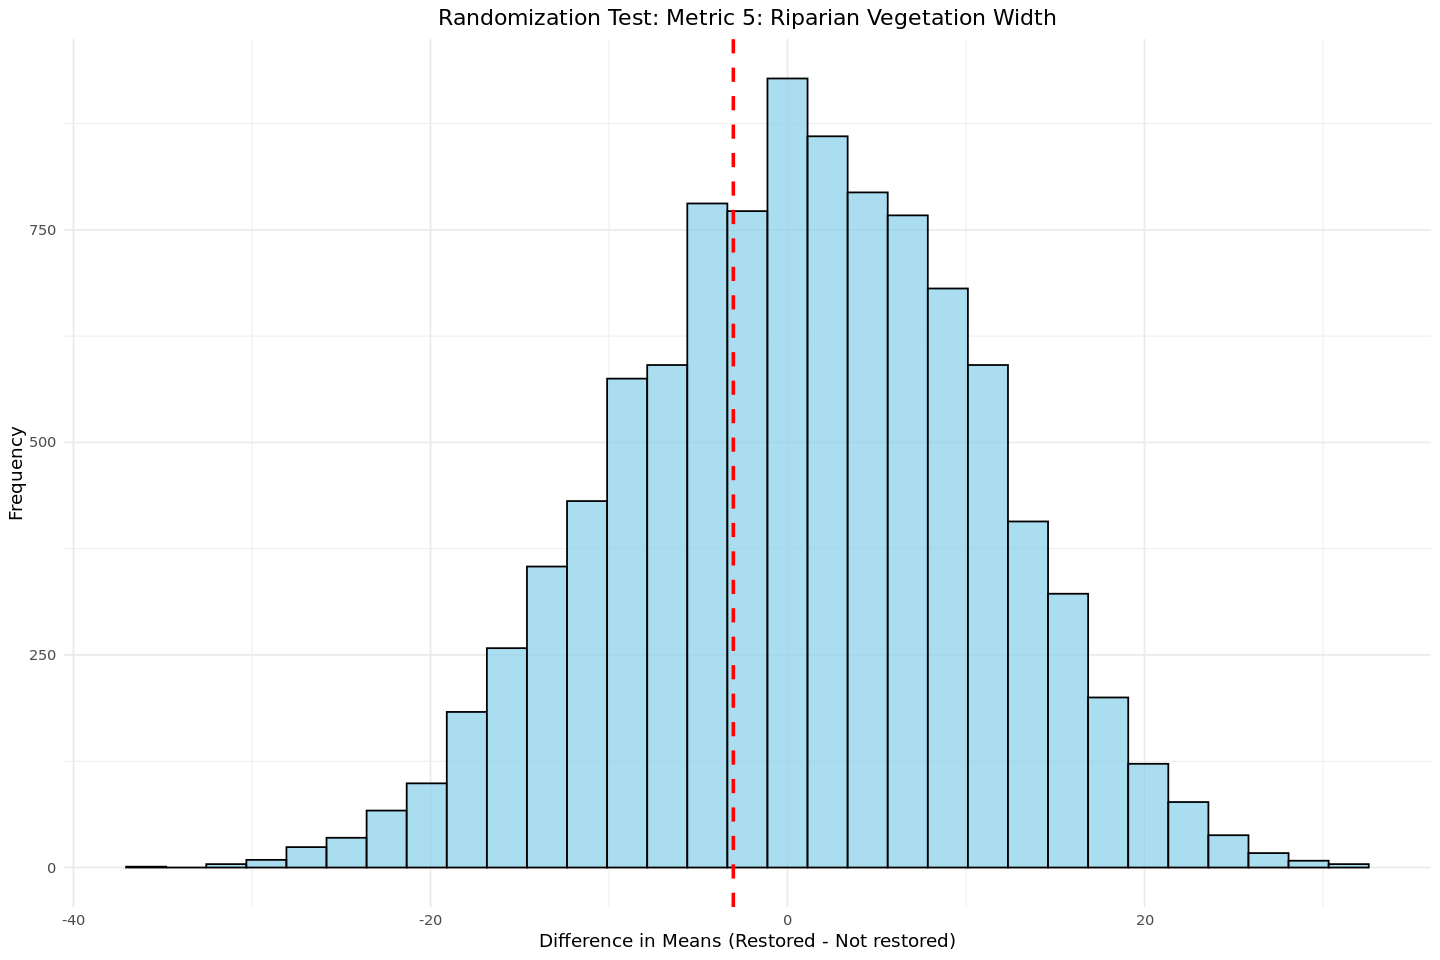

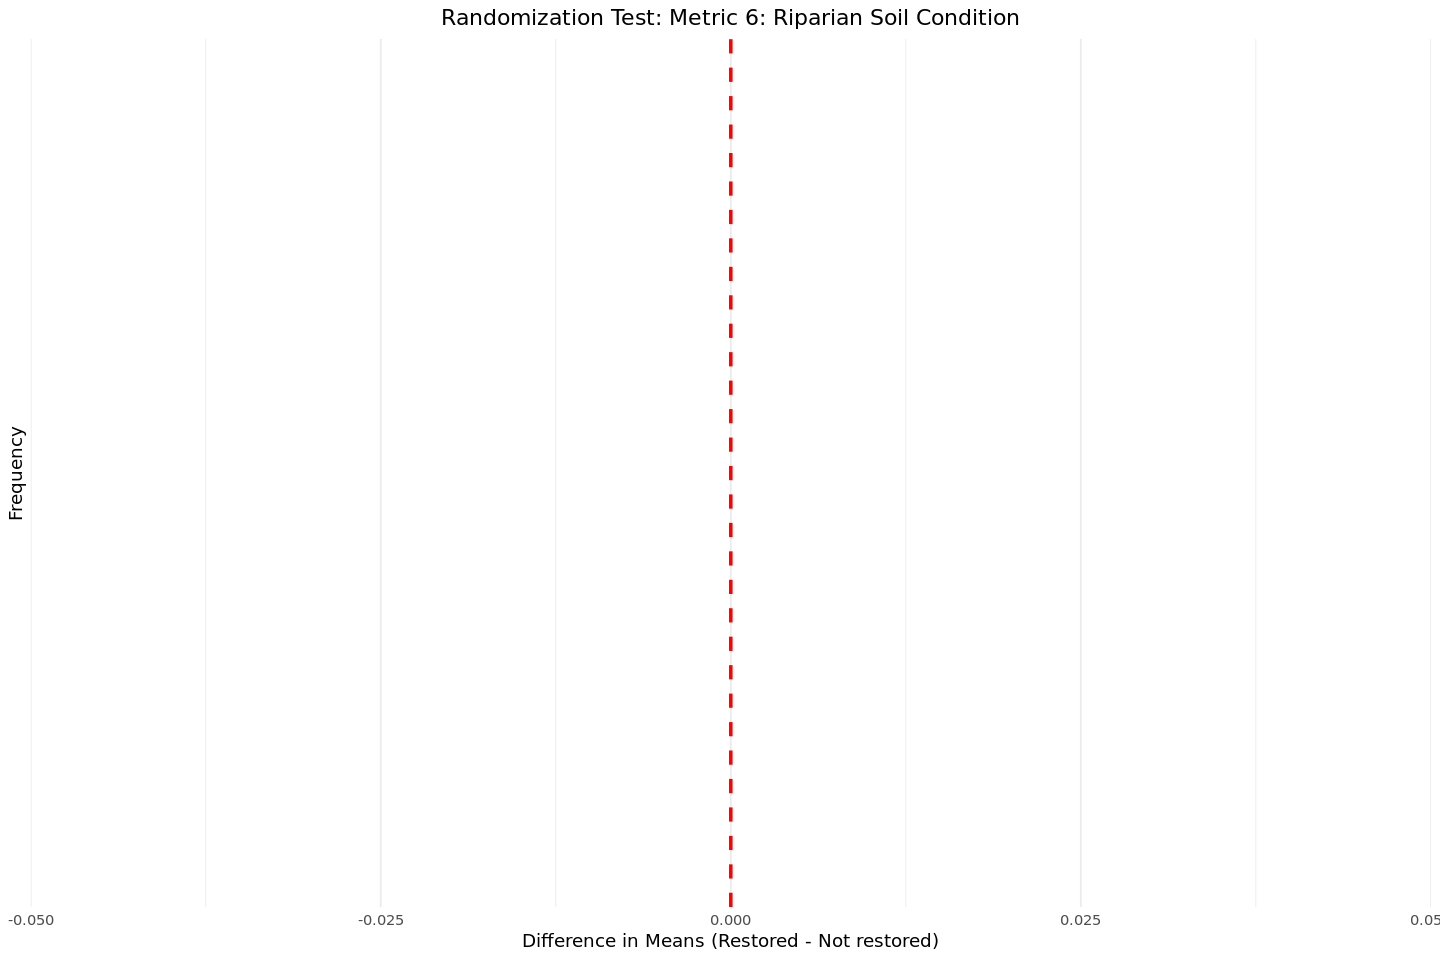

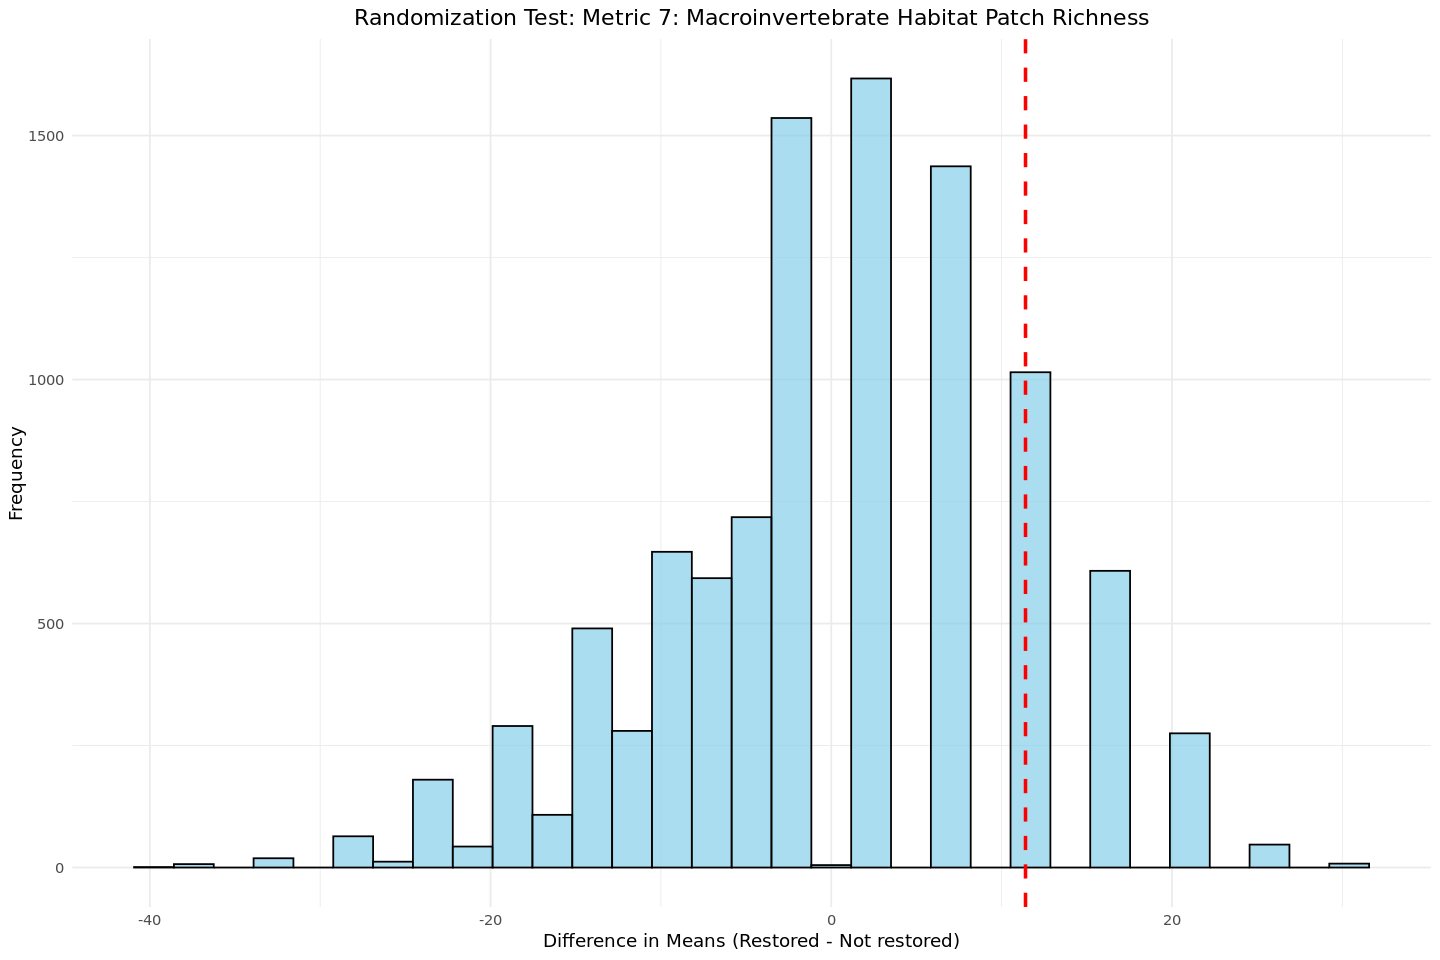

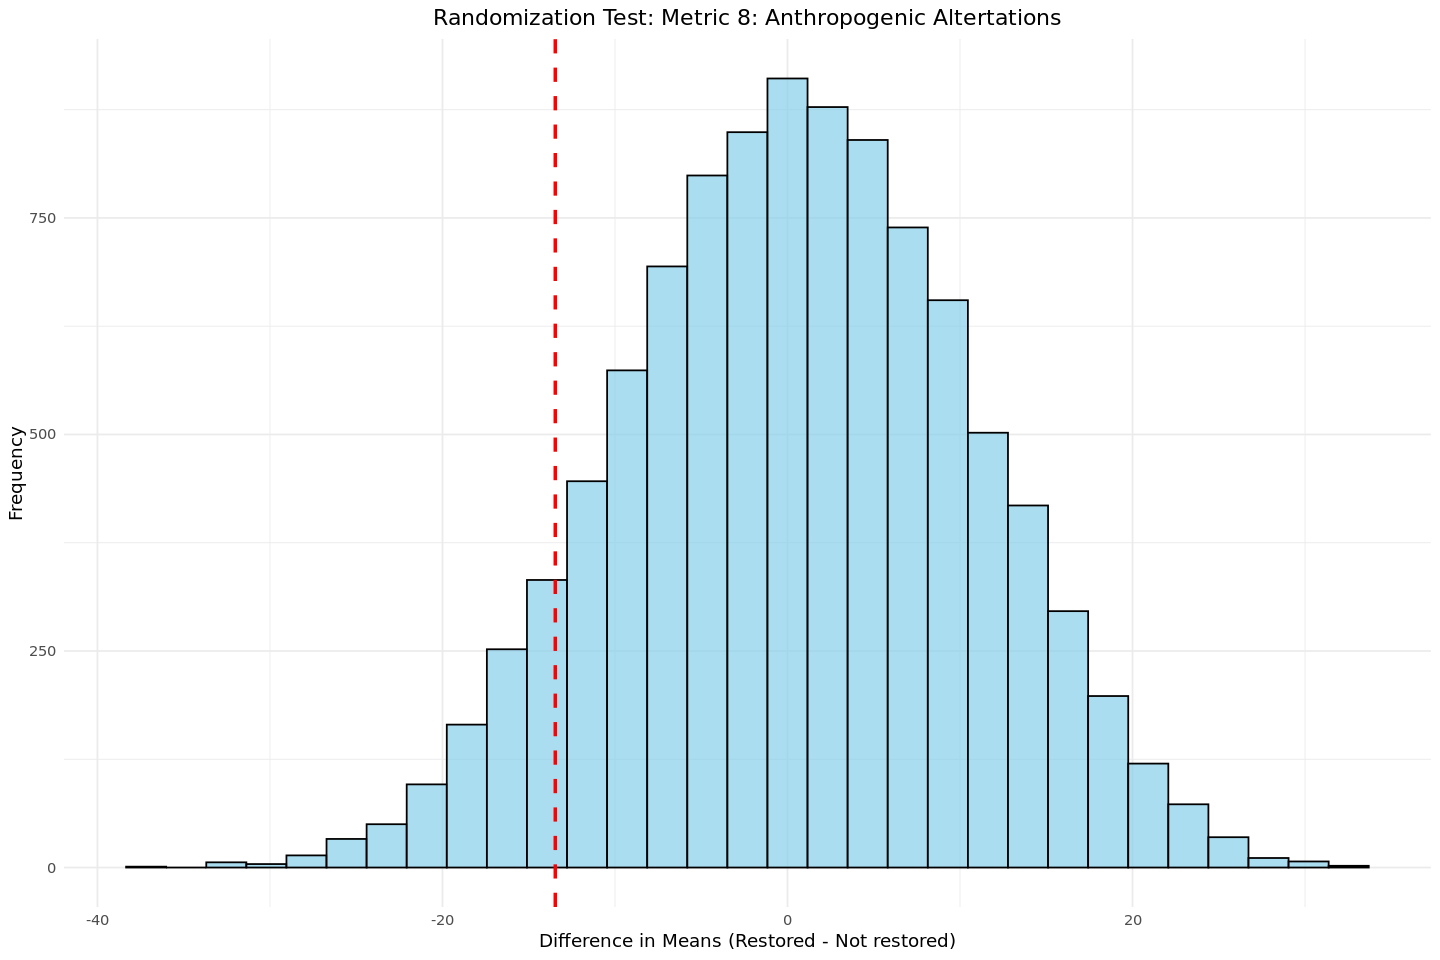

In [98]:
# Chose your metrics
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

#Chose your problem. NOTE: YOU MUST COMMENT OUT THE SELECTION YOU DO NOT WANT TO USE WITH A #
#problem = c("N/S")
problem = c("restoration")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols =  names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]

# Number of randomizations
n_perm = 10000

# Build a table to put results
results = data.frame(Metric = metric_cols, Observed_Diff = NA, P_Value = NA)

for (m in metric_cols) {

     # ---- Define comparison groups depending on problem type ----
  if (problem == "N/S") {
    group1 = "North"
    group2 = "South"
    group_var = "Fork"
    label = "(N - S)"
  } else if (problem == "restoration") {
    group1 = "Y"
    group2 = "N"
    group_var = "Restoration"
    label = "(Restored - Not restored)"
  } else {
    stop("Unknown problem type. Must be 'N/S' or 'restoration'.")
  }

  # Compute observed difference
  obs_diff = mean(straw_creek_data[straw_creek_data[[group_var]] == group1, m, drop = TRUE]) -
              mean(straw_creek_data[straw_creek_data[[group_var]] == group2, m, drop = TRUE])

  # Run permutation test
 rand_diffs = replicate(n_perm, {
    permuted = sample(straw_creek_data[[group_var]])
    mean(straw_creek_data[permuted == group1, m, drop = TRUE]) - mean(straw_creek_data[permuted == group2, m, drop = TRUE])
  })

  
  # Skip if all rand_diffs are NA (Shouldn't happen!! Check labels in cells)
  if (all(is.na(rand_diffs))) {
    warning(paste("Skipping", m, "- all permutation differences NA"))
    next
  }
  
# Compute p-value
p_val = mean(abs(rand_diffs) >= abs(obs_diff))
  
# Store results
results[results$Metric == m, c("Observed_Diff", "P_Value")] = c(obs_diff, p_val)
  
# ggplot histogram
  perm_df = data.frame(Difference = rand_diffs)
  
    p = ggplot(perm_df, aes(x = Difference)) +
    geom_histogram(binwidth = diff(range(rand_diffs)) / 30,
                   fill = "skyblue", color = "black", alpha = 0.7) +
    geom_vline(xintercept = obs_diff, color = "red", linetype = "dashed", size = 1) +
    labs(
      x = paste("Difference in Means", label),
      y = "Frequency",
      title = paste("Randomization Test:", m)
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  print(p)
}


In [100]:
# Run this to get a summary table of your results!

results

Metric,Observed_Diff,P_Value
<chr>,<dbl>,<dbl>
Metric 1: Total Vegetation Cover,-5.925926,0.7378
Metric 2: Vegetation Structure,-9.698942,0.5454
Metric 3: Vegetation Quality,13.558201,0.3093
Metric 4: Age Diversity,15.997354,0.0959
Metric 5: Riparian Vegetation Width,-3.034392,0.7893
Metric 6: Riparian Soil Condition,0.000000,1.0000
Metric 7: Macroinvertebrate Habitat Patch Richness,11.402116,0.3167
Metric 8: Anthropogenic Altertations,-13.460317,0.1771


## Congratulations on completing the lab!

## Submitting Your Work

**Make sure that you've answered all the questions.**

You are now finished with this notebook!

__Right-click__ on one the set of graphs you want to use in your group’s abstract.
Click Save Image As... and Save the Image